#Testing Xray on weather forecast model data

In [21]:
import xray
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [22]:
URL = 'http://thredds.ucar.edu/thredds/dodsC/grib/NCEP/GFS/Global_0p5deg/Best'

In [23]:
ds = xray.open_dataset(URL)

In [24]:
ds

<xray.Dataset>
Dimensions:                                                                     (altitude_above_msl: 3, depth_below_surface_layer: 4, depth_below_surface_layer_bounds_1: 2, height_above_ground: 1, height_above_ground1: 2, height_above_ground2: 1, height_above_ground3: 3, height_above_ground4: 3, height_above_ground_layer: 1, height_above_ground_layer1: 1, height_above_ground_layer1_bounds_1: 2, height_above_ground_layer_bounds_1: 2, isobaric: 12, isobaric1: 1, isobaric2: 21, isobaric3: 26, lat: 361, lon: 720, potential_vorticity_surface: 2, pressure_difference_layer: 1, pressure_difference_layer1: 1, pressure_difference_layer1_bounds_1: 2, pressure_difference_layer2: 2, pressure_difference_layer2_bounds_1: 2, pressure_difference_layer_bounds_1: 2, sigma: 1, sigma_layer: 4, sigma_layer_bounds_1: 2, time: 207, time1: 206, time2: 206, time2_bounds_1: 2)
Coordinates:
  * lat                                                                         (lat) float32 90.0 ...
  * lo

In [25]:
# select lat,lon region of interest
# note: slice(20.5,55.0) fails
dsloc = ds.sel(lon=slice(230.5,300.0),lat=slice(55.0,20.5))

In [26]:
# select closest data to time of interest
#date = datetime.datetime(2015,7,15,3,0,0)
date = datetime.datetime.now()
ds_snapshot = dsloc.sel(time=date,time1=date,time2=date,method='nearest')

In [27]:
ds.data_vars

Data variables:
    LatLon_Projection                                                           int32 ...
    time2_bounds                                                                (time2, time2_bounds_1) datetime64[ns] ...
    depth_below_surface_layer_bounds                                            (depth_below_surface_layer, depth_below_surface_layer_bounds_1) float32 ...
    height_above_ground_layer_bounds                                            (height_above_ground_layer, height_above_ground_layer_bounds_1) float32 ...
    pressure_difference_layer_bounds                                            (pressure_difference_layer, pressure_difference_layer_bounds_1) float32 ...
    height_above_ground_layer1_bounds                                           (height_above_ground_layer1, height_above_ground_layer1_bounds_1) float32 ...
    pressure_difference_layer1_bounds                                           (pressure_difference_layer1, pressure_difference_layer1_bounds_1)

In [28]:
ds.coords

Coordinates:
  * lat                                  (lat) float32 90.0 89.5 89.0 88.5 ...
  * lon                                  (lon) float32 0.0 0.5 1.0 1.5 2.0 ...
  * time                                 (time) datetime64[ns] 2015-08-21 ...
    reftime                              (time) datetime64[ns] ...
  * time1                                (time1) datetime64[ns] 2015-08-21T03:00:00 ...
    reftime1                             (time1) datetime64[ns] ...
  * time2                                (time2) datetime64[ns] 2015-08-21T03:00:00 ...
    reftime2                             (time2) datetime64[ns] ...
  * depth_below_surface_layer            (depth_below_surface_layer) float32 0.05 ...
  * isobaric                             (isobaric) float32 1000.0 2000.0 ...
  * height_above_ground_layer            (height_above_ground_layer) float32 1500.0 ...
  * height_above_ground                  (height_above_ground) float32 2.0
  * potential_vorticity_surface          (pot

In [29]:
ds.attrs

OrderedDict([(u'Originating_or_generating_Center', u'US National Weather Service, National Centres for Environmental Prediction (NCEP)'), (u'Originating_or_generating_Subcenter', u'0'), (u'GRIB_table_version', u'2,1'), (u'Type_of_generating_process', u'Forecast'), (u'Analysis_or_forecast_generating_process_identifier_defined_by_originating_centre', u'Analysis from GFS (Global Forecast System)'), (u'file_format', u'GRIB-2'), (u'Conventions', u'CF-1.6'), (u'history', u'Read using CDM IOSP GribCollection v3'), (u'featureType', u'GRID'), (u'_CoordSysBuilder', u'ucar.nc2.dataset.conv.CF1Convention')])

In [30]:
t = ds_snapshot['Temperature_surface']

In [40]:
t.time.values

numpy.datetime64('2015-09-04T05:00:00.000000000-0400')

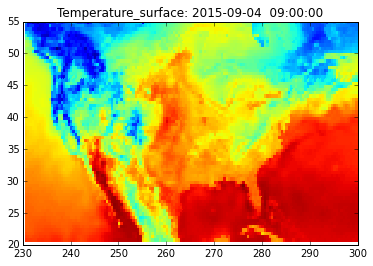

In [32]:
plt.pcolormesh(t.lon.data,t.lat.data,t.data)
plt.title(t.name+pd.Timestamp(t.time.values).strftime(': %Y-%m-%d  %H:%M:%S %Z %z'));

In [33]:
# time series closest to specified lon,lat location
ds_series = ds.sel(lon=250.,lat=33.,method='nearest')

In [34]:
# Select temperature and convert to Pandas Series
v_series = ds_series['Temperature_surface'].to_series()

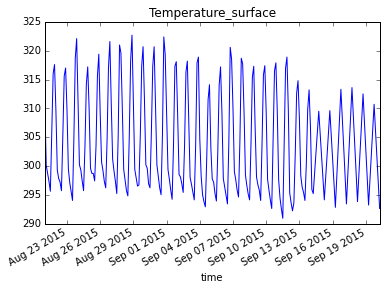

In [35]:
v_series.plot(title=v_series.name);

In [36]:
ds_snapshot

<xray.Dataset>
Dimensions:                                                                     (altitude_above_msl: 3, depth_below_surface_layer: 4, depth_below_surface_layer_bounds_1: 2, height_above_ground: 1, height_above_ground1: 2, height_above_ground2: 1, height_above_ground3: 3, height_above_ground4: 3, height_above_ground_layer: 1, height_above_ground_layer1: 1, height_above_ground_layer1_bounds_1: 2, height_above_ground_layer_bounds_1: 2, isobaric: 12, isobaric1: 1, isobaric2: 21, isobaric3: 26, lat: 70, lon: 140, potential_vorticity_surface: 2, pressure_difference_layer: 1, pressure_difference_layer1: 1, pressure_difference_layer1_bounds_1: 2, pressure_difference_layer2: 2, pressure_difference_layer2_bounds_1: 2, pressure_difference_layer_bounds_1: 2, sigma: 1, sigma_layer: 4, sigma_layer_bounds_1: 2, time2_bounds_1: 2)
Coordinates:
  * lat                                                                         (lat) float32 55.0 ...
  * lon                                   

In [37]:
#ds_snapshot.to_netcdf('ds_snapshot.nc')